In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from engine import Value
from neural_net import Neuron, Layer, MLP


In [2]:
np.random.seed(7331)
random.seed(7331)


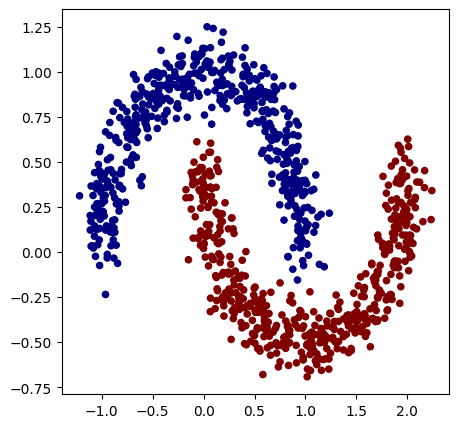

In [3]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=1000, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')


In [4]:
# model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))


MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [ReLUNeuron(16)]]
number of parameters 337


In [5]:
# loss function
def loss(batch_size=None):
    
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    

    scores = list(map(model, inputs))
    
    
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
   

    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
   
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)


Value(data=0.8347082633143103, grad=0.0) 0.536


In [6]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # stochastic gradient descent
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 0.8347082633143103, accuracy 53.6%
step 1 loss 0.4343545833311994, accuracy 78.7%
step 2 loss 0.3626976244183676, accuracy 82.89999999999999%
step 3 loss 0.32064992901368816, accuracy 85.8%
step 4 loss 0.29943690203884454, accuracy 86.7%
step 5 loss 0.28720589094775834, accuracy 87.4%
step 6 loss 0.27878511610236517, accuracy 87.2%
step 7 loss 0.2721869960552111, accuracy 87.5%
step 8 loss 0.26609081254450406, accuracy 87.6%
step 9 loss 0.2599423166296068, accuracy 87.9%
step 10 loss 0.2537074955930332, accuracy 88.6%
step 11 loss 0.2481158987776445, accuracy 89.4%
step 12 loss 0.24364914900623957, accuracy 89.60000000000001%
step 13 loss 0.23981924227205417, accuracy 90.0%
step 14 loss 0.23621720668672946, accuracy 90.10000000000001%
step 15 loss 0.23270851192530956, accuracy 90.0%
step 16 loss 0.22923142236329272, accuracy 90.0%
step 17 loss 0.22573313869666115, accuracy 90.3%
step 18 loss 0.2221578158331504, accuracy 90.5%
step 19 loss 0.21844241844001883, accuracy 90.5%

(-1.6916348142211766, 2.0583651857788237)

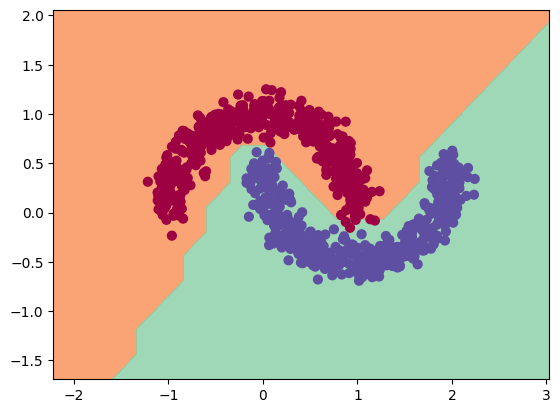

In [7]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
